## Experimenting on training set 

The aim of the experiment is to find out the performance of the model regardless of how small our dataset can be.
 - `Steps`:
  - Firstly, we split our dataset into 1007 test set and 790 training set.
  - Then out of our training set we get an initial subsample of size 10. Making sure all our labels are well represented.
  - Afterwards we fit a model on the initail dataset and determine its accuracy. 
  - Later we randomly increase the subsample size to still we exhaust the training set. Each time fititng a model and determine its accuracy

### Importimg Libraries

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
# Stop deprecation warnings from being printed

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

`Loading data`

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()


`Splitting the dataset into training and testing set.`

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(digits.images, digits.target, test_size=0.56, random_state=42)


`We can see the size of the training data`

In [5]:
(len(X_train) ,len(Y_train))

(790, 790)

`We can see the size of the testing data`

In [6]:
(len(X_test), len(Y_test))

(1007, 1007)

This function helps to find all the indices of a given label in the Y_train sample. Then later out these indices we select the one position for each label. Thus, giving us our initial subsample 

In [12]:
def selector(y,pos):
    '''
    This function returns the indices
    to of each label
    y : is the array of labels
    pos : is the indicator of the label in the 
    ''' 

    ind = []
    for i in range(10):
        ind.append(np.argwhere(Y_train==i).reshape(1, -1)[0,pos])
    return ind

In [13]:
# evaluting the function for the first position of each label

selector(Y_train,0)

[11, 5, 3, 16, 1, 17, 24, 9, 2, 0]

Rand_checker is to help the random selection of the subsequent data points.

In [14]:
def Rand_checker(known_list, sample_size, upper_limit):
    '''
    This function generates random numbers
    to be used as subsequence indices for 
    the other sample
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    '''
    
    Rand_set = []
    while len(Rand_set) < sample_size:
        r = np.random.randint(upper_limit)
        if r not in Rand_set and r not in known_list:
            Rand_set.append(r)
    return Rand_set

In [16]:
def generate_index(known_list, sample_size, upper_limit):
    '''
    This function return the indices  for all
    for all the subsamples to be consider
    
    know_list : is initial indice list
    
    sample_size : the size of the subsample to be generated
    
    upper_limit : is the len of the array of labels
    
    '''
    index_lst=[]
    while len(known_list) < upper_limit:
        if sample_size > upper_limit - len(known_list):
            sample_size = upper_limit - len(known_list)
        index_lst.append(known_list.copy())
        L = Rand_checker(known_list, sample_size, upper_limit)
        known_list.extend(L)
    index_lst.append(known_list.copy())
    return index_lst

 ### Fitting the random forest model.
 
 Making model from the first initial subsample till the final one having step size of 10 increment everytime.

In [162]:
k = generate_index(selector(Y_train,0),10,790)

accuracy_results=[]
train_interval=[]
for i in k:
    rf_model = RandomForestClassifier(random_state=11)
    x_train = [X_train[j].reshape(64) for j in i]
    rf_model.fit(x_train, Y_train[i])
    train_interval.append(len(i))
    # predicting the model for X_test sample 
    x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
    y_predtest = rf_model.predict(x_test)

    # classification accuracy for the test data prediction verses actual

    pred_acc = accuracy_score(y_predtest, Y_test)
    accuracy_results.append(pred_acc)

Visualizing the result.

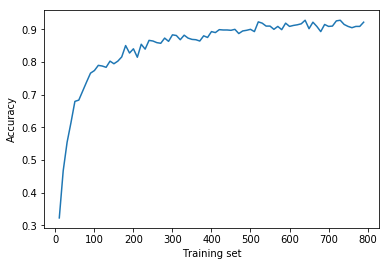

In [163]:
#train_interval= range(10,800,47)
plt.plot(train_interval,accuracy_results)
plt.xlabel('Training set')
plt.ylabel('Accuracy')
plt.show()

From the above diagram with the accuracy level shows a progressing increasing level when we increase the sample size. The initail 10 data points had about 30% accuracy and when all the training was used there was an accuracy of about 90%. A significant improvement. From the diagram, we may conclude that we about 200 training set we can have a good model as the accuracy is about 80% on test data.

## Visualizing the results with different step size

In [190]:
accuracy_results1={}
train_interval1 ={}
l = []
rng = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
for r in rng:
    g = generate_index(selector(Y_train,0),r,790)
    train_interval1[str(r)] = []
    for i in g:
        rf_model = RandomForestClassifier(random_state=11)
        x_train = [X_train[j].reshape(64) for j in i]
        train_interval1[str(r)].append(len(i))
        rf_model.fit(x_train, Y_train[i])

        # predicting the model for X_test sample 
        x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
        y_predtest = rf_model.predict(x_test)

        # classification accuracy for the test data prediction verses actual

        pred_acc = accuracy_score(y_predtest, Y_test)
        l.append(pred_acc)
    accuracy_results1[str(r)]=l
    l=[]

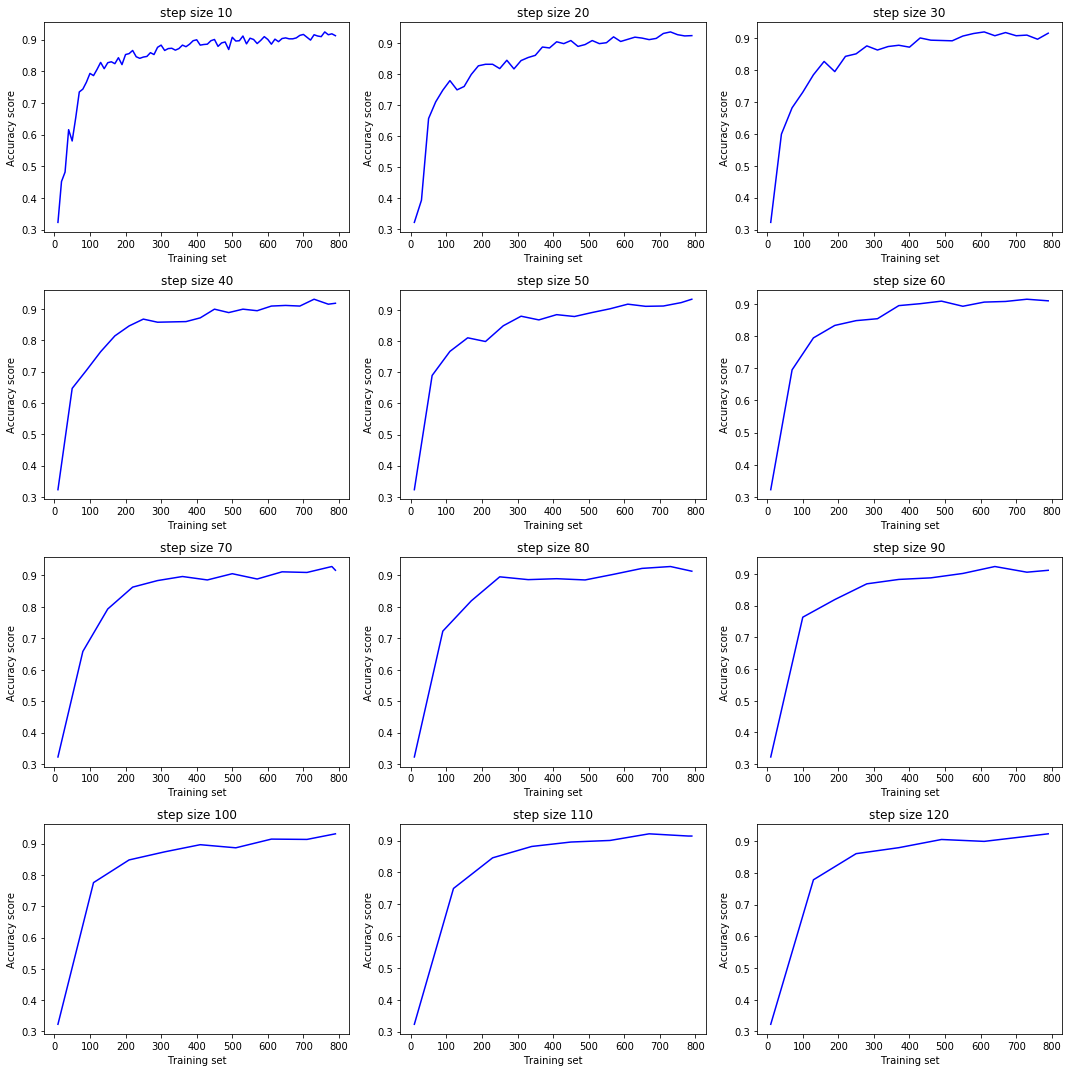

In [191]:
fig = plt.figure(figsize=(15, 15))
for i in rng:
    sub1 = fig.add_subplot(4,3,i/10)
    sub1.plot(train_interval1[str(i)], accuracy_results1.get(str(i)),'b')
    sub1.set_xlabel('Training set')
    sub1.set_ylabel('Accuracy score')
    sub1.set_title("step size %s"%i)
    
plt.tight_layout()

plt.show()



From the above diagrams, the curves show increasing levels of accuracy scores for each step size. Also, the model is a good fit from about 200 dataset.

In [109]:
'''
finding out the length of the indicing list for each label
This is to help us know the number of intial subsample we can create 
'''

count_sample = []
for i in range(10):
    count_sample.append(len(np.argwhere(Y_train==i).reshape(1, -1)[0]))
print('The minimum number of initial subsample that can be formed is ', min(count_sample))

The minimum number of initial subsample that can be formed is  71


Now with different initial conditions we will want to investigate the accuracy score. 


We can have 71 initial sample of size 10. But we will look at a few (6 of them).

In [168]:
accuracy_results1={}
train_interval1 ={}
l = []
for r in range(6):
    g = generate_index(selector(Y_train,r),10,790)
    train_interval1[str(r)] = []
    for i in g:
        rf_model = RandomForestClassifier(random_state=11)
        x_train = [X_train[j].reshape(64) for j in i]
        train_interval1[str(r)].append(len(i))
        rf_model.fit(x_train, Y_train[i])

        # predicting the model for X_test sample 
        x_test = [ X_test[l].reshape(64) for l in range(len(X_test))]
        y_predtest = rf_model.predict(x_test)

        # classification accuracy for the test data prediction verses actual

        pred_acc = accuracy_score(y_predtest, Y_test)
        l.append(pred_acc)
    accuracy_results1[str(r)]=l
    l=[]

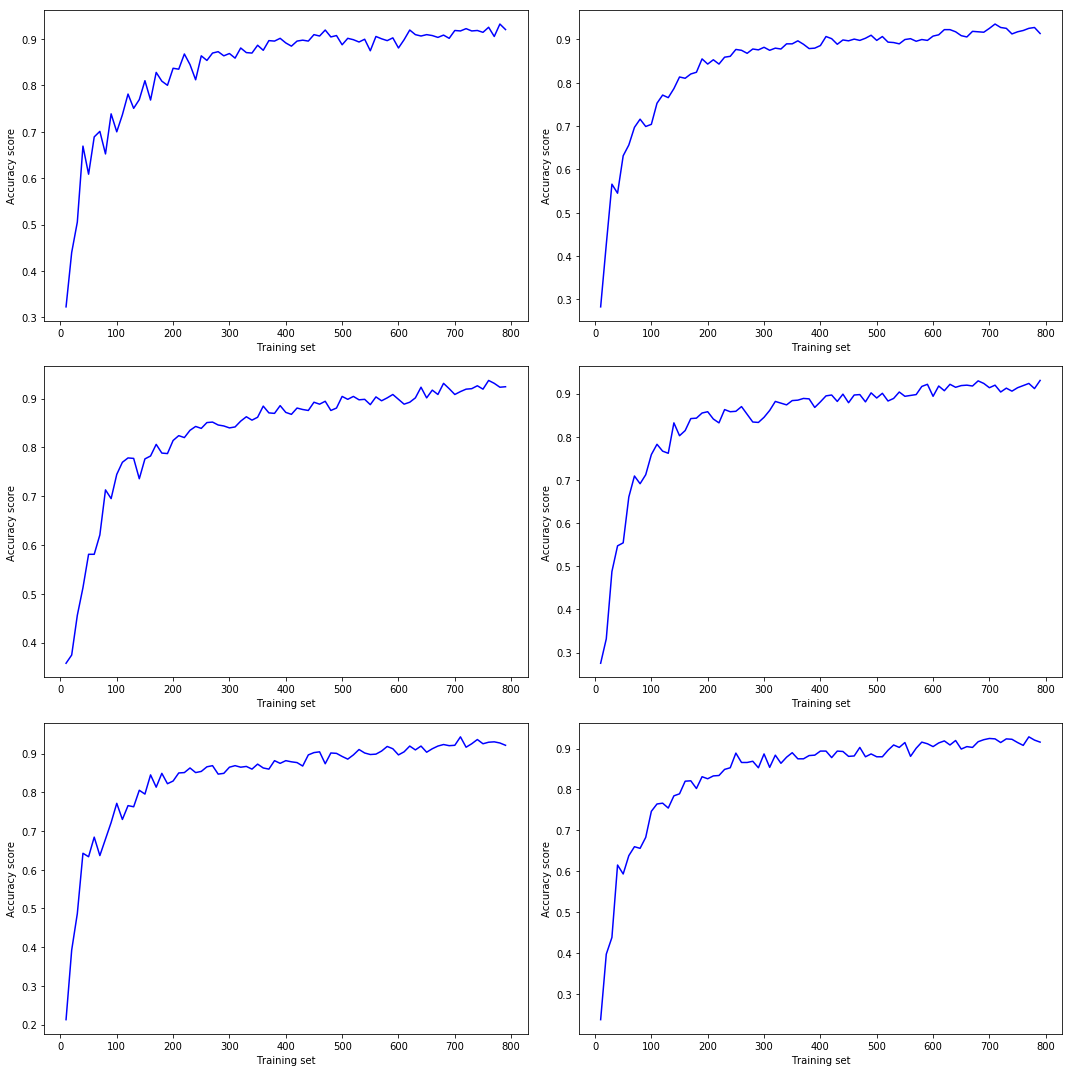

In [171]:
fig = plt.figure(figsize=(15, 15))
for i in range(6):
    sub1 = fig.add_subplot(3,2,i+1)
    sub1.plot(train_interval1[str(i)], accuracy_results1.get(str(i)),'b')
    sub1.set_xlabel('Training set')
    sub1.set_ylabel('Accuracy score')
    
plt.tight_layout()

plt.show()



From the above diagrams, the models are all performing badly with the initial sample size of 10 but as the size increases the accuracy_score tend to increase. We also observed that with from 200 training set all the models have good performs.  

## Conclusion

In conclusion, we observed that add more data(examples) increase the performance of the model till the learning converges. Also, we may conclude that it is enough to have about 200 data points to fit a model.